- [Open with Colab](https://colab.research.google.com/github/satoxlab/learning-R/master/probability_distribution_basic.ipynb) 
# 正規分布  


 
- 連続で実数値をとる確率変数Xを観測して得られるデータから、標本平均を求めると、データ数nが大きくなるほど正規分布に近づく。
- 複数の確率的要因の帰結とみなせるような実験ノイズや、複数の細胞内分子衝突とみなせる反応ばらつきなどが正規分布に近似する。

※ たとえば「日本人の成人」という母集団（約1億人）から500人を無作為抽出して標本調査を実施して、身長の標本平均（n=500）を得た。この標本平均という標本統計量が正規分布する。500人の個々の身長という観測値の度数分布が正規分布に似ていることではなく、500人の平均身長が正規分布する。


## 正規分布の確率密度関数  dnorm
```R
dnorm(x, mean, sd)
```
mean ： 平均  
sd ： 標準偏差

mean, sdを省略した場合は、平均0、標準偏差1の標準正規分布となる。


### curve()関数で正規分布を描画

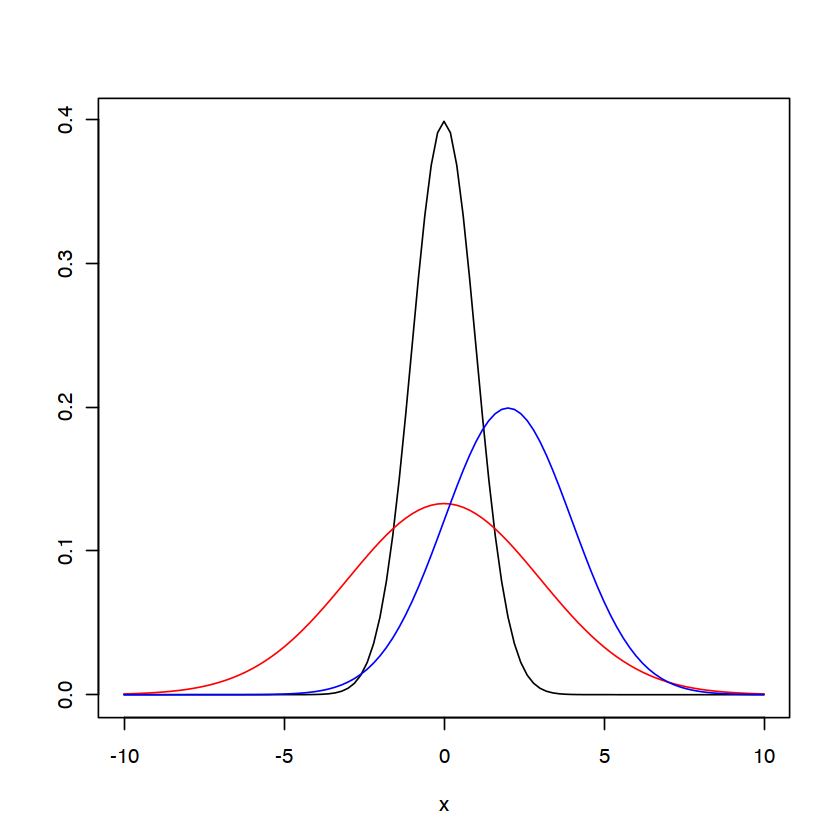

In [39]:
curve(dnorm(x, mean=0, sd=1), from=-10, to=10, ylab ="")         # 平均０、標準偏差１の標準正規分布
curve(dnorm(x, mean=0, sd=3), from=-10, to=10, col="red", add=TRUE  )    # 平均０、標準偏差3の正規分布
curve(dnorm(x, mean=2, sd=2), from=-10, to=10, col="blue", add=TRUE  )  # 平均2、標準偏差2の正規分布

## 正規分布関係の関数

In [65]:
pnorm(0, mean=0, sd=1)  #指定したｚ値の下側確率

qnorm(0.025, mean=0, sd=1)  # 指定した下側確率に対応する境界値

[1] 0.5

[1] -1.959964

### パッケージ(ggplot2)で正規分布を描画

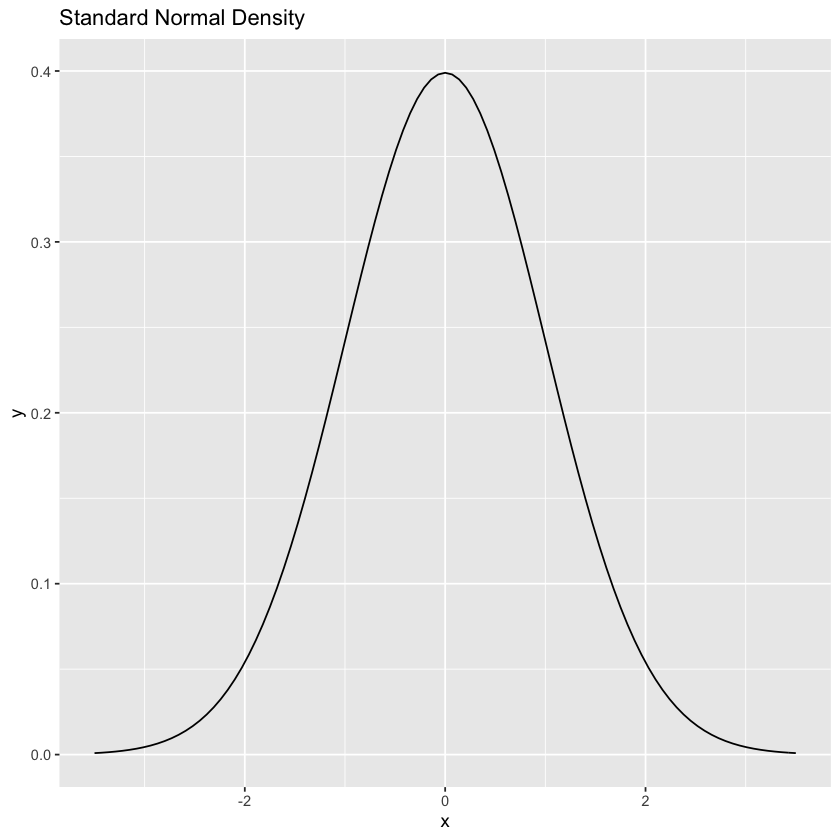

In [12]:
library(ggplot2)

ggplot(data.frame(x = c(-3.5, 3.5))) +
    aes(x) +
    stat_function(fun = dnorm, args=list(mean=0, sd=1)) +
    ggtitle("Standard Normal Density")　　　　　# 平均０、標準偏差１の標準正規分布

# 対数正規分布


- 確率変数の対数値が正規分布をする統計分布
- PCRなど何らかの増幅系を介した観測量、もしくは細胞増殖や複製サイクルの影響が寄与している現象など、増殖率にあたる変数が正規分布的にばらつくと対数正規分布が現れる


## 対数正規分布の密度関数  dlnorm

```R
dlnorm(x, mean, sd)　
```
mean ： 平均  
sd ： 標準偏差


### curve()関数で描画

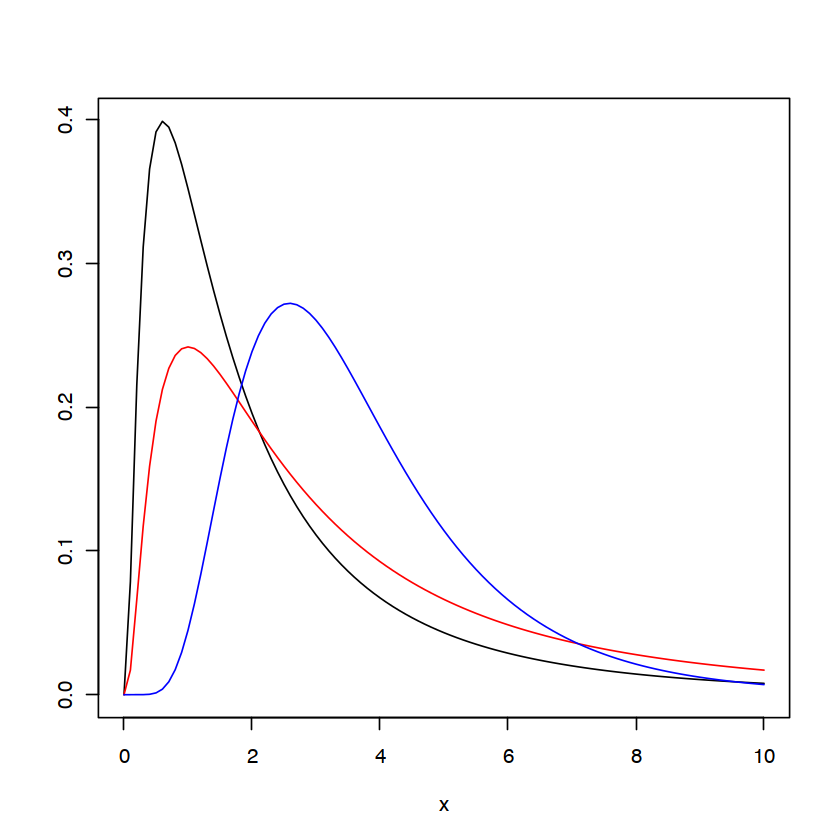

In [40]:
curve(dlnorm(x, mean=0.5, sd=1), from=0, to=10, ylab ="")    # 平均０.5、標準偏差１の対数正規分布
curve(dlnorm(x, mean=1, sd=1), from=0, to=10, col="red", add=TRUE )    
curve(dlnorm(x, mean=1.2, sd=0.5), from=0, to=10, col="blue", add=TRUE )  

### パッケージ(ggplot2)で描画

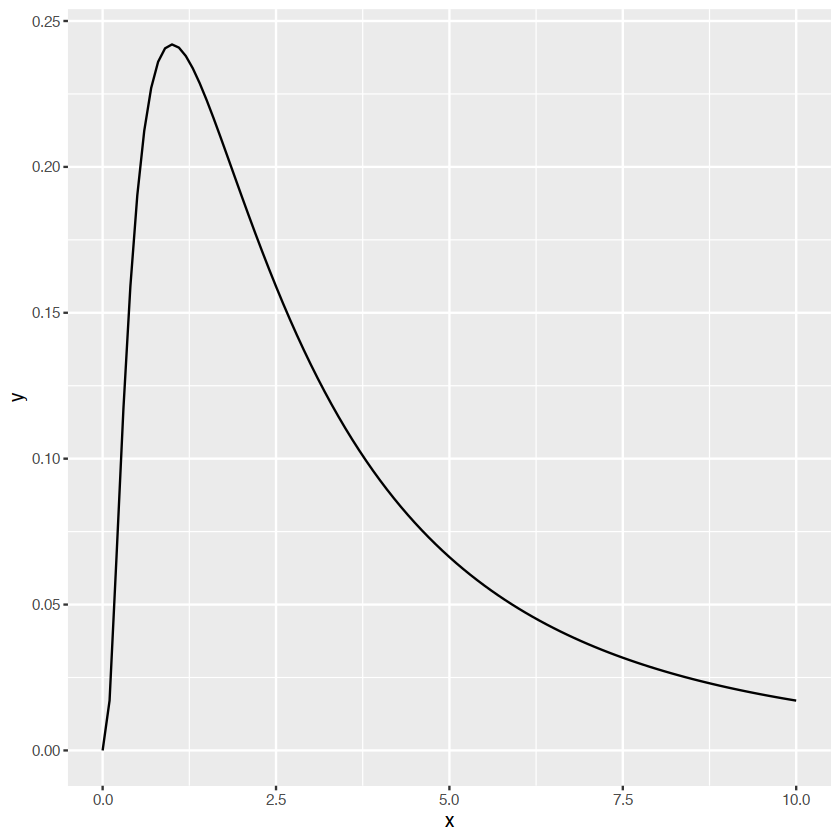

In [49]:
library(ggplot2)

ggplot(data.frame(x = c(0, 10))) +
    aes(x) +
    stat_function(fun = dlnorm,args=list(mean=1, sd=1))    # 平均1、標準偏差１の対数正規分布

# 指数分布


- ランダムなイベントが発生するまでの期間の分布
- リガンド１分子が膜に結合するまでの待ち時間、もしくは結合したリガンド分子が離れるまでの解離待ち時間のばらつきを表現する際に指数分布を用いる。


## 指数分布の確率密度関数  dexp

```R
dexp(x, rate = 1, log = FALSE)
```

1/rate　：　平均


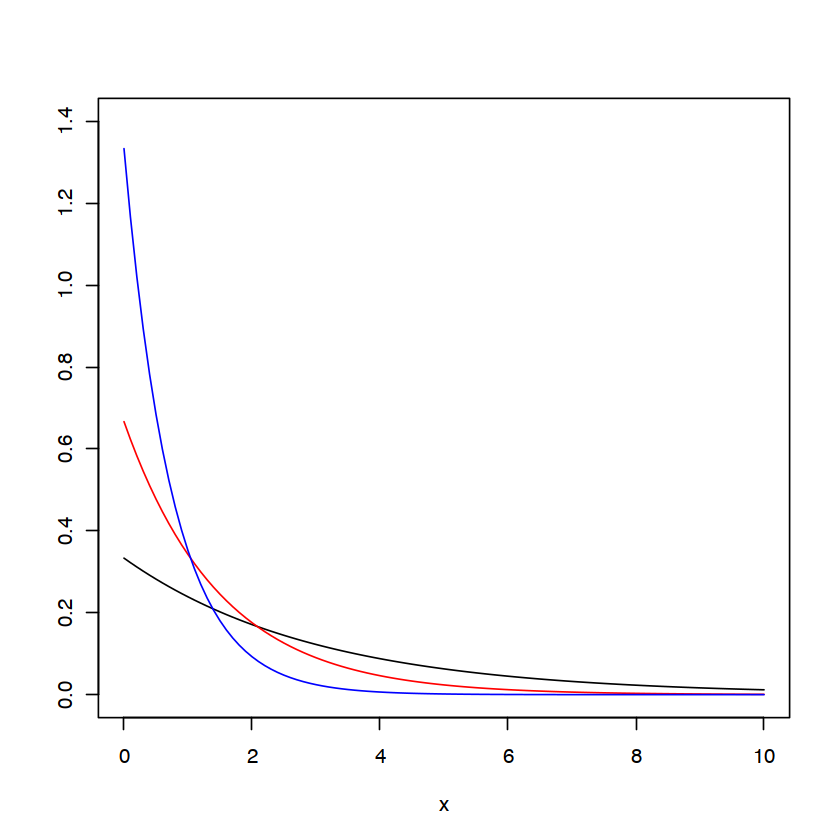

In [47]:
curve(dexp(x, rate = 1/3, log = FALSE), from=0, to=10, ylim=c(0,1.4), ylab ="")  
curve(dexp(x, rate = 2/3, log = FALSE), from=0, to=10, col="red", add=TRUE)  
curve(dexp(x, rate = 4/3, log = FALSE), from=0, to=10, col="blue", add=TRUE)  

# ガンマ分布


- 一定期間に1回起きると期待されるランダムな事象が複数回起きるまでの時間の分布
- 指数分布の複数回起きるときバージョン
- 細胞分裂の待ち時間や、遺伝子発現ゆらぎのデータが近似できる


## ガンマ分布の確率密度関数  dgamma
```R
dgamma(x, shape, rate = 1, log = FALSE)
```

shape : 形状、何回起こるか  
rate : 起こる率（scale=1/rate : 期間）  
shape = 1 のとき、ガンマ分布は指数分布に一致する。  



### curve()関数で描画

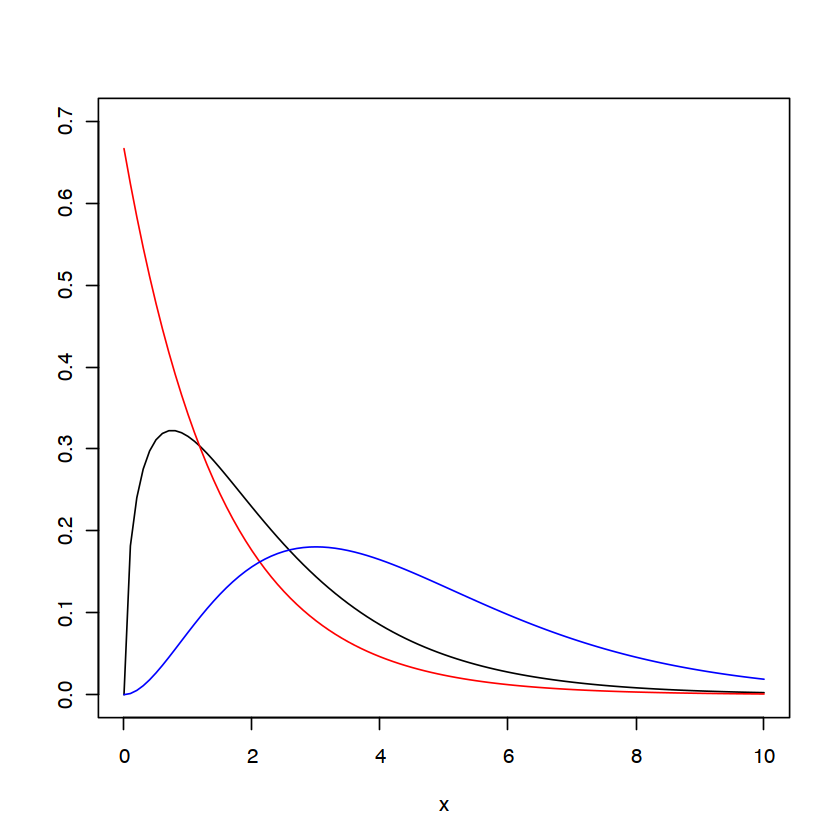

In [57]:
curve(dgamma(x, shape=3/2, rate=2/3),from=0,to=10, ylim=c(0,0.7), ylab ="")　　
curve(dgamma(x, shape=1, rate=2/3),from=0,to=10, col="red", add=TRUE)     # 2/3の率で１回起こる時のガンマ分布
curve(dgamma(x, shape=3, rate=2/3),from=0,to=10, col="blue", add=TRUE)

# ポアソン分布


- 二項分布において試行回数が大きく、発生確率が小さい場合の分布
- ある期間に平均λ回起こる現象が、ある期間に X回起きる確率の分布
- 離散分布
- 分散は平均に等しい
- 反応の生起回数の解析によく現れる。


## ポアソン分布の確率密度関数  dpois
```R
dpois(x, lambda, log = FALSE)
```

x : 起きる回数  
lambda : ある期間に起きる回数の平均  

ポアソン分布の平均は lambda、分散も lambda

### plot()関数でポアソン分布を描画   

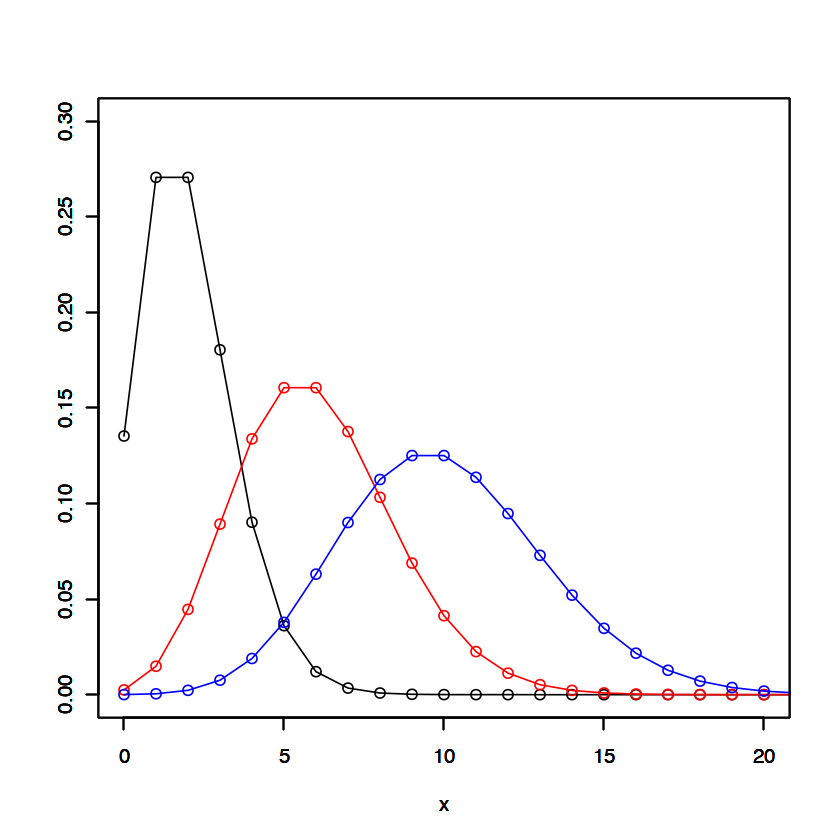

In [55]:
x <- rep(0:100)

plot(x,dpois(x, lambda=2), type="o", xlim=c(0,20), ylim=c(0,0.3), ylab ="")    # ある期間に平均　2回起きるときのポアソン分布

par(new=T)   # 重ね描き
plot(x,dpois(x, lambda=6), type="o",　col="red", xlim=c(0,20), ylim=c(0,0.3), ylab ="") 

par(new=T) 
plot(x,dpois(x, lambda=10), type="o",　col="blue", xlim=c(0,20), ylim=c(0,0.3), ylab ="") 

# 負の二項分布


- ポアソン分布を２パラメータに拡張した分布
- 確率pで表の出るコインを投げて、表がn回出るまでに裏が出た回数cの分布
- コインを 5 回投げた時に表が出る回数は二項分布に従うが、5 回表が出るまでコインを投げ続けた時に裏が出る回数は負の二項分布に従う
- 離散型分布
- RNA-seq のカウントデータの解析に用いる。

## 負の二項分布の確率密度関数

```R
dnbinom(x, size, prob, mu, log = FALSE)
```

size : 	成功した試行回数、または分散パラメーター1  
prob : 各試行での成功の確率。0 < prob <= 1  
mu : 平均

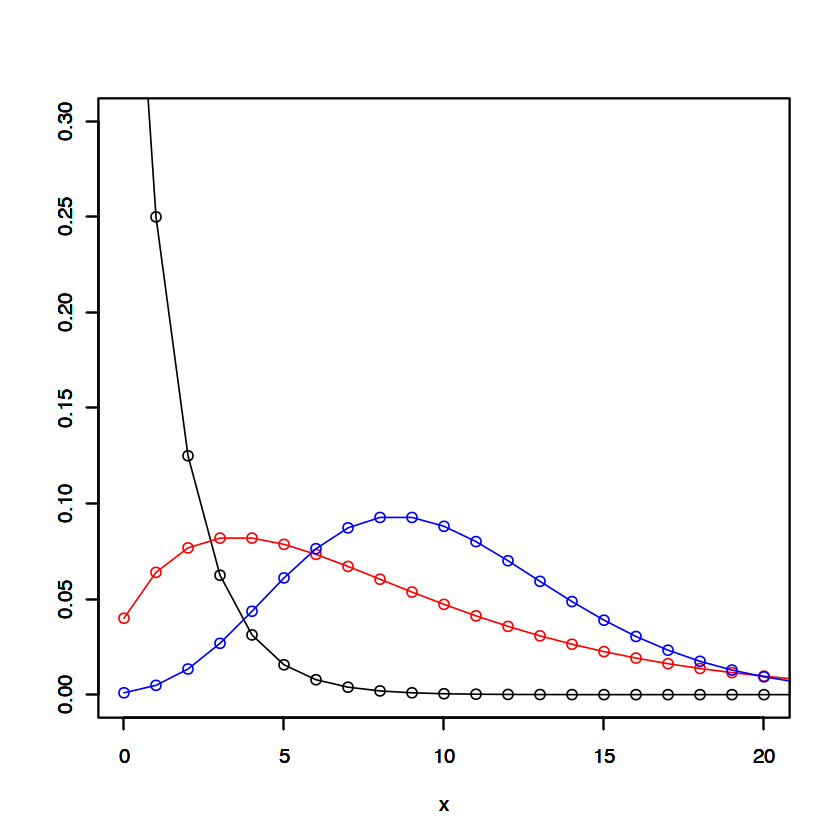

In [66]:
x <- rep(0:100)

plot(x, dnbinom(x, size=1, prob=0.5 ), type="o", xlim=c(0,20), ylim=c(0,0.3), ylab ="")  # 確率0.5で２回成功した場合の負の二項分布

par(new=T)   # 重ね描き
plot(x, dnbinom(x, size=2, prob=0.2),　type="o",　col="red", xlim=c(0,20), ylim=c(0,0.3), ylab ="") 

par(new=T)   # 重ね描き
plot(x, dnbinom(x, size=10, prob=0.5),　type="o",　col="blue", xlim=c(0,20), ylim=c(0,0.3), ylab ="") 


不明点：「定量生物学」に掲載されているφとμがわかりません。n=1/φであるなら、φ=0のとき、nは？


# t分布

- xが正規分布N（μ，σ^2）のとき、標本平均を標本標準偏差s（母標準偏差未知）を使って標準化すると t分布になる


## t分布の確率密度関数
```R
dt(x, df１)
```

df１ : 自由度


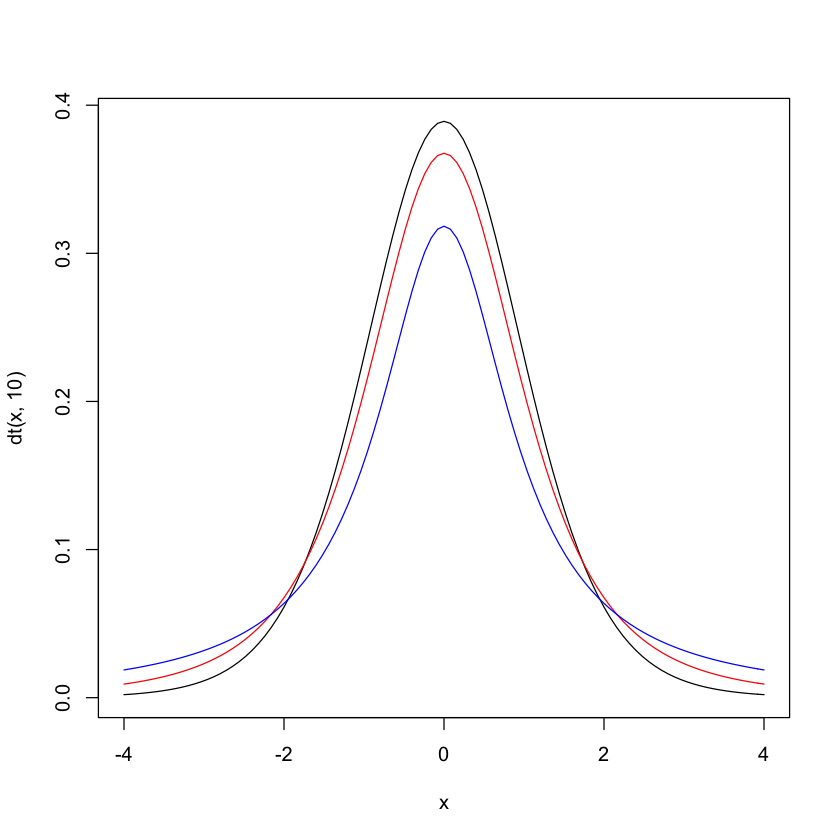

In [74]:
curve(dt(x,10),from=-4,to=4, ylab ="") # 自由度10のt分布
curve(dt(x,3), col="red", add=T)
curve(dt(x,1),　col="blue", add=T)